In [1]:
# Import necessary modules
import sys
from IPython.display import display

sys.path.append("../")

# Import classes for data preparation and indicators from custom modules
from src.finance_ml.data_preparation.data_preparation import DataLoader
from src.finance_ml.indicators.indicators import Indicators

# Load the autoreload extension in IPython for automatic module reloading
%load_ext autoreload

# Configure autoreload to reload all modules every time before executing code
%autoreload 2

In [2]:
# Import required packages
import pandas as pd
import numpy as np

In [3]:
# DataLoader object definition with time_index_col and keep_cols parameters
dataloader = DataLoader(
    time_index_col="DATE",
    keep_cols=["VOLUME", "OPEN", "HIGHT", "LOW", "CLOSE", "VW", "TRANSACTIONS"], 
)

In [4]:
# Example Files
fname_FB = "equities/FB_2020-04-07_2022-04-06.parquet"
fname_TSLA = "equities/TSLA_2020-04-07_2022-04-06.parquet"
fname_AAPL = "equities/AAPL_2020-04-07_2022-04-06.parquet"

# No. of Records from example dataset
N = 250

In [5]:
# Dataset chosen in this simulation
ticker = "TSLA"
fname = fname_TSLA

In [6]:
# Load assets into a single DataFrame
df = dataloader.load_dataset({ticker: "../data/" + fname}).iloc[:N]
display(df)


,TSLA_VOLUME,TSLA_OPEN,TSLA_HIGHT,TSLA_LOW,TSLA_CLOSE,TSLA_VW,TSLA_TRANSACTIONS
DATE,,,,,,,
2020-04-07 12:44:00,12730.0,107.8200,108.022,107.8000,108.022,107.9410,62
2020-04-07 12:45:00,2660.0,108.1000,108.100,108.1000,108.100,108.1064,32
2020-04-07 12:46:00,25895.0,108.1200,108.200,108.0600,108.100,108.1376,79
2020-04-07 12:47:00,4750.0,108.0020,108.160,108.0000,108.160,108.0972,42
2020-04-07 12:48:00,9385.0,108.1980,108.200,108.1520,108.200,108.1773,56
...,...,...,...,...,...,...,...
2020-04-07 16:53:00,60040.0,111.0642,111.094,110.8500,110.924,110.9801,344
2020-04-07 16:54:00,96665.0,110.9020,111.126,110.9000,111.078,111.0293,379
2020-04-07 16:55:00,66165.0,111.0530,111.178,111.0000,111.160,111.1052,321


In [7]:
# Essential columns in the dataset
data_cols = ["DATE", "OPEN", "HIGHT", "LOW", "CLOSE", "VW", "VOLUME"]

# Columns of indicators with default parameters
var_cols = [
    "CLOSE_returns",
    "CLOSE_log_returns",
    "CLOSE_price_change",
    "CLOSE_pct_change",
    "RA_5",
    "RA_10",
    "AMPL",
    "OPNCLS",
    "MA_5",
    "MA_10",
    "V_MA_5",
    "V_MA_10",
    "V_MA_20",
    "KAMA_w10p(02,30)",
    "PPO_w(26,12)",
    "PVO_w(26,12)s09",
    "PVOH_w(26,12)s09",
    "PVOsgn_w(26,12)s09",
    "ROC_w12",
    "RSI_w14",
    "StRSI_w14s(03,03)",
    "StRSId_w14s(03,03)",
    "StRSIk_w14s(03,03)",
    "SO_w14s03",
    "SOsgn_w14s03",
    "AOI_w(05,34)",
    "TSI_w(25,13)",
    "UO_wi(07,14,28)wg(4.0,2.0,1.0)",
    "WRI_14",
    "ADI",
    "CMF_w20",
    "EOM_w14",
    "EMV_w14",
    "FI_w13",
    "MFI_w14",
    "NVI",
    "OBV",
    "VPT",
    "VWAP_w14",
    "ADX_w14",
    "ADXP_w14",
    "ADXN_w14",
    "AROOND_w25",
    "AROON_w25",
    "AROONU_w25",
    "CCI_w20",
    "DPO_w20",
    "EMA_w14",
    "SMA_w14",
    "ICHIA_w(09,26,52)",
    "ICHIB_w(09,26,52)",
    "ICHIBL_w(09,26,52)",
    "ICHICL_w(09,26,52)",
    "KST_r(10,15,20,30)_w(10,10,10,15)",
    "KSTD_r(10,15,20,30)_w(10,10,10,15)",
    "KSTS_r(10,15,20,30)_w(10,10,10,15)",
    "MACD_w(26,12,09)",
    "MACDD_w(26,12,09)",
    "MACDS_w(26,12,09)",
    "MI_w(09,25)",
    "PSAR_s(0.02,0.2)",
    "PSARD_s(0.02,0.2)",
    "PSARDI_s(0.02,0.2)",
    "PSARU_s(0.02,0.2)",
    "PSARUI_s(0.02,0.2)",
    "STC_w(50,23)c10s(03,03)",
    "TRIX_w15",
    "VI_w14",
    "VIN_w14",
    "VIP_w14",
    "WMA_w09",
]

# For each of calculated column, we add the ticker code, as standardized by class 𝙳𝚊𝚝𝚊𝙻𝚘𝚊𝚍𝚎𝚛
var_cols = [ticker + "_" + col for col in var_cols]
norm_cols = [col + "_norm" for col in var_cols]

In [8]:
# Data normalization process
norm_data = True  # Flag for data normalization

# Indicator transformer selection and initialization
ind_processor = Indicators(ticker=ticker, norm_data=True)

# Calculate indicators on the input dataframe
df = ind_processor.fit_transform(df)

if norm_data:
    df_norm = ind_processor.data_norm  # Normalized data if norm_data is True

In [9]:
# Display dataframe with Indicators
display(df[var_cols].dropna(axis=0).head(10))

,TSLA_CLOSE_returns,TSLA_CLOSE_log_returns,TSLA_CLOSE_price_change,TSLA_CLOSE_pct_change,TSLA_RA_5,TSLA_RA_10,TSLA_AMPL,TSLA_OPNCLS,TSLA_MA_5,TSLA_MA_10,...,"TSLA_PSARD_s(0.02,0.2)","TSLA_PSARDI_s(0.02,0.2)","TSLA_PSARU_s(0.02,0.2)","TSLA_PSARUI_s(0.02,0.2)","TSLA_STC_w(50,23)c10s(03,03)",TSLA_TRIX_w15,TSLA_VI_w14,TSLA_VIN_w14,TSLA_VIP_w14,TSLA_WMA_w09
DATE,,,,,,,,,,,,,,,,,,,,,
2020-04-07 13:59:00,1.000399,0.000398,0.0448,0.000399,0.617484,1.207961,0.4859,0.0020,111.87698,110.87772,...,107.526079,0.0,110.8140,0.0,100.0,0.093241,0.879391,0.556156,1.435547,111.585929
2020-04-07 14:00:00,0.999489,-0.000511,-0.0575,-0.000511,0.557736,1.152658,0.5829,-0.0058,112.09508,111.18924,...,107.526079,0.0,111.2512,0.0,100.0,0.106091,0.818578,0.581970,1.400548,111.855542
2020-04-07 14:01:00,0.993732,-0.006287,-0.7045,-0.006268,0.326672,0.905608,0.9060,-0.6180,112.20674,111.44464,...,113.000000,1.0,111.2512,0.0,100.0,0.116163,0.726535,0.610877,1.337412,111.911844
2020-04-07 14:02:00,0.998603,-0.001398,-0.1560,-0.001397,0.445355,0.778683,0.4660,-0.1060,112.10354,111.58604,...,112.970000,0.0,111.2512,0.0,100.0,0.123422,0.624006,0.677698,1.301704,111.902058
2020-04-07 14:03:00,1.001578,0.001577,0.1760,0.001578,0.432335,0.702715,0.5300,0.1140,111.96410,111.69474,...,112.902960,0.0,111.2512,0.0,100.0,0.128555,0.611606,0.699082,1.310689,111.907227
2020-04-07 14:04:00,0.997744,-0.002258,-0.2520,-0.002256,0.371562,0.484029,0.4440,-0.2680,111.76530,111.82114,...,112.838602,0.0,111.2512,0.0,100.0,0.131333,0.491819,0.785506,1.277324,111.828307
2020-04-07 14:05:00,1.003572,0.003566,0.3982,0.003572,0.156555,0.449778,0.7540,0.4115,111.65764,111.87636,...,112.776818,0.0,111.2512,0.0,100.0,0.132870,0.466638,0.751080,1.217717,111.825604
2020-04-07 14:06:00,0.993759,-0.006261,-0.6982,-0.006241,0.265289,0.445043,0.9860,-0.7700,111.55124,111.87899,...,112.717505,0.0,111.2512,0.0,50.0,0.131993,0.346001,0.837964,1.183965,111.667162
2020-04-07 14:07:00,0.997589,-0.002414,-0.2680,-0.002411,0.395349,0.535237,0.4660,-0.3142,111.42244,111.76299,...,112.621415,0.0,111.2512,0.0,25.0,0.128803,0.125888,0.942930,1.068818,111.474942


In [10]:
# Display dataframe with Indicators of normalized data
if norm_data:
    display(df_norm[norm_cols].dropna(axis=0).head(10))

,TSLA_CLOSE_returns_norm,TSLA_CLOSE_log_returns_norm,TSLA_CLOSE_price_change_norm,TSLA_CLOSE_pct_change_norm,TSLA_RA_5_norm,TSLA_RA_10_norm,TSLA_AMPL_norm,TSLA_OPNCLS_norm,TSLA_MA_5_norm,TSLA_MA_10_norm,...,"TSLA_PSARD_s(0.02,0.2)_norm","TSLA_PSARDI_s(0.02,0.2)_norm","TSLA_PSARU_s(0.02,0.2)_norm","TSLA_PSARUI_s(0.02,0.2)_norm","TSLA_STC_w(50,23)c10s(03,03)_norm",TSLA_TRIX_w15_norm,TSLA_VI_w14_norm,TSLA_VIN_w14_norm,TSLA_VIP_w14_norm,TSLA_WMA_w09_norm
DATE,,,,,,,,,,,,,,,,,,,,,
2020-04-07 13:59:00,0.980845,-0.047660,-0.059900,-0.052242,0.415804,0.831598,-0.276935,-0.047949,0.875824,0.572786,...,-1.000000,-1.0,0.746363,-1.0,1.000000e+00,0.577541,0.868291,-0.878841,0.850957,0.866322
2020-04-07 14:00:00,0.979044,-0.146712,-0.161692,-0.151204,0.272961,0.744914,-0.132589,-0.055660,0.957953,0.705703,...,-1.000000,-1.0,0.922045,-1.0,1.000000e+00,0.714529,0.797179,-0.817597,0.771386,0.976907
2020-04-07 14:01:00,0.967646,-0.775505,-0.805473,-0.777331,-0.279454,0.357674,0.348214,-0.660900,1.000000,0.814675,...,1.000000,1.0,0.922045,-1.0,1.000000e+00,0.821895,0.689548,-0.749016,0.627840,1.000000
2020-04-07 14:02:00,0.977291,-0.243185,-0.259701,-0.247503,0.004286,0.158725,-0.306548,-0.154721,0.961139,0.875006,...,0.989039,-1.0,0.922045,-1.0,1.000000e+00,0.899285,0.569654,-0.590483,0.546655,0.995986
2020-04-07 14:03:00,0.983180,0.080602,0.070647,0.076038,-0.026840,0.039649,-0.211310,0.062778,0.908630,0.921386,...,0.964545,-1.0,0.922045,-1.0,1.000000e+00,0.954006,0.555155,-0.539749,0.567083,0.998106
2020-04-07 14:04:00,0.975590,-0.336876,-0.355224,-0.340943,-0.172132,-0.303131,-0.339286,-0.314879,0.833770,0.975317,...,0.941030,-1.0,0.922045,-1.0,1.000000e+00,0.983621,0.415081,-0.334709,0.491227,0.965736
2020-04-07 14:05:00,0.987130,0.297175,0.291741,0.292984,-0.686161,-0.356819,0.122024,0.356896,0.793229,0.998878,...,0.918456,-1.0,0.922045,-1.0,1.000000e+00,1.000000,0.385635,-0.416385,0.355706,0.964628
2020-04-07 14:06:00,0.967698,-0.772640,-0.799204,-0.774486,-0.426204,-0.364240,0.467262,-0.811172,0.753162,1.000000,...,0.896785,-1.0,0.922045,-1.0,-2.980232e-08,0.990656,0.244568,-0.210251,0.278968,0.899641
2020-04-07 14:07:00,0.975283,-0.353804,-0.371144,-0.357817,-0.115264,-0.222865,-0.306548,-0.360554,0.704661,0.950506,...,0.861677,-1.0,0.922045,-1.0,-5.000000e-01,0.956645,-0.012822,0.038781,0.017174,0.820800


<AxesSubplot:xlabel='DATE'>

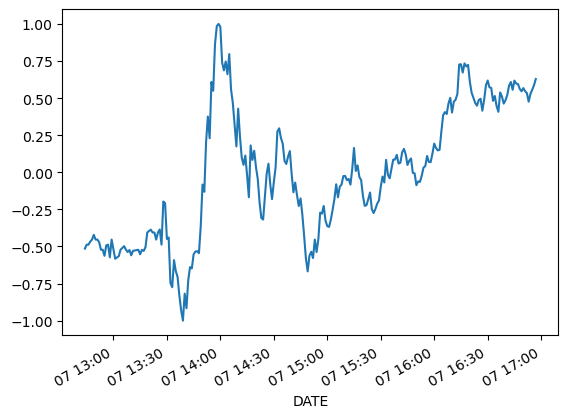

In [11]:
# Plotting normalized closing prices for TSLA
df1 = df_norm["TSLA_CLOSE_norm"]
df1.plot(kind="line")

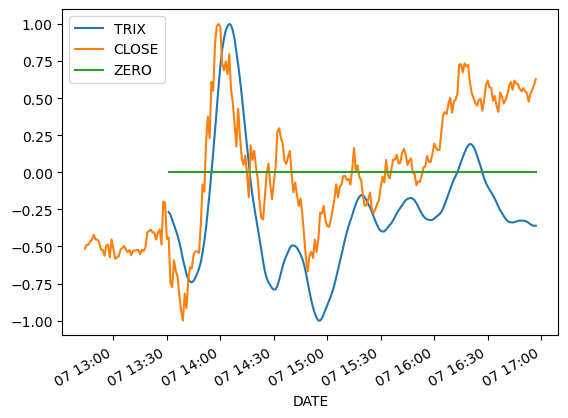

In [12]:
from matplotlib import pyplot as plt

df2_trix = df_norm["TSLA_TRIX_w15_norm"]

# Plotting normalized TRIX indicator data
df2_trix.plot(kind="line")
df1.plot(kind="line")

# Adding a zero line to the plot
plt.plot(df2_trix * 0, label="Zero")

plt.legend(["TRIX", "CLOSE", "ZERO"])

As can be seen from the graph, when TRIX is above the zero line (which means that the market is overbought) the closing price keeps increasing along with TRIX and this very high value of indicator means that we shouldn't buy/should sell. And when TRIX is below the zero line we can see the opposite of this dynamics.

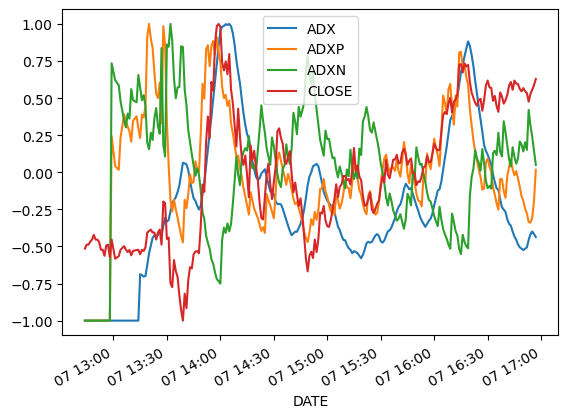

In [13]:
df2_adx = df_norm["TSLA_ADX_w14_norm"]
df2_adxp = df_norm["TSLA_ADXP_w14_norm"]
df2_adxn = df_norm["TSLA_ADXN_w14_norm"]

# Plotting ADX indicator along with its positive ADXP (+DI) and negative ADXN (-DI) directional indicators and as well as closing price
df2_adx.plot(kind="line")
df2_adxp.plot(kind="line")
df2_adxn.plot(kind="line")
df1.plot(kind="line")

plt.legend(["ADX", "ADXP", "ADXN", "CLOSE"])

Here we first look at how ADXP (positive directional indicator) and ADXN (negative directional indicator) move. If ADXP is above ADXN then it means there is upward trend and if ADXN is above ADXP it means there downward trend. And then we look at ADX which shows us how strong is this trend.

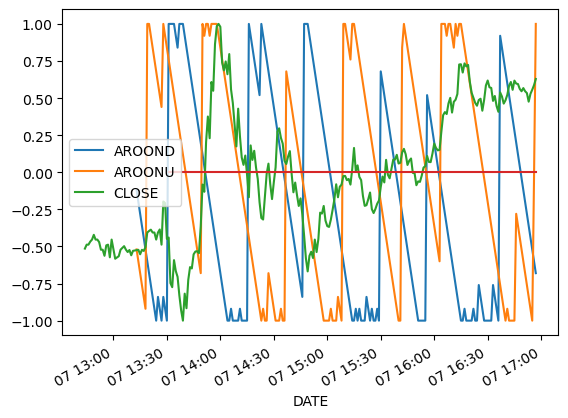

In [14]:
df2_aroond = df_norm["TSLA_AROOND_w25_norm"]
df2_aroonu = df_norm["TSLA_AROONU_w25_norm"]

# Plotting the AROON Down and AROON Up indicators along with closing price
df2_aroond.plot(kind="line")
df2_aroonu.plot(kind="line")
df1.plot(kind="line")

# Adding a zero line to the plot
plt.plot(df2_trix * 0, label="Zero")

plt.legend(["AROOND", "AROONU", "CLOSE"])

As we can see from the graph, when closing price increases (bullish behavior) AROONU goes above AROOND and reaches 1 and when closing price decreases (bearish behavior) AROOND goes above AROONU and reaches 1. Crossovers of the two lines signals trend changes. If either of the lines is above zero line it means that high/low  (whichever line is above) was seen within the last 12 periods.

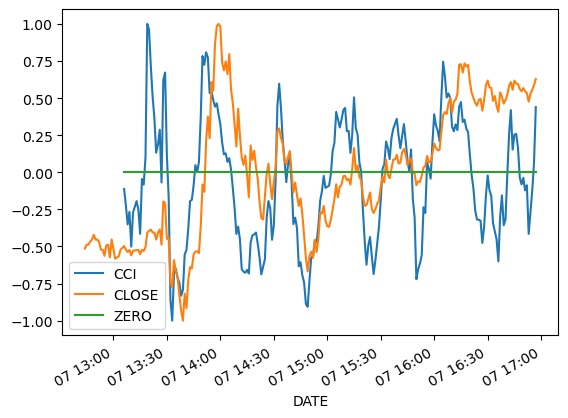

In [15]:
df2_cci = df_norm["TSLA_CCI_w20_norm"]

df2_cci.plot(kind="line")
df1.plot(kind="line")
plt.plot(df2_cci * 0, label="Zero")

plt.legend(["CCI", "CLOSE", "ZERO"])

As we can see from the graph, when CCI is above zero CLOSING price has a strong upward trend and when it is below zero it has a strong downward trend.